In [1]:
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('processed_data.csv')

df = df.reset_index(drop=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             50000 non-null  int64  
 1   num_passengers         50000 non-null  int64  
 2   sales_channel          50000 non-null  object 
 3   trip_type              50000 non-null  object 
 4   purchase_lead          50000 non-null  int64  
 5   length_of_stay         50000 non-null  int64  
 6   flight_hour            50000 non-null  int64  
 7   flight_day             50000 non-null  int64  
 8   route                  50000 non-null  object 
 9   booking_origin         50000 non-null  object 
 10  wants_extra_baggage    50000 non-null  int64  
 11  wants_preferred_seat   50000 non-null  int64  
 12  wants_in_flight_meals  50000 non-null  int64  
 13  flight_duration        50000 non-null  float64
 14  booking_complete       50000 non-null  int64  
 15  le

In [4]:
df.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [5]:
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,lead_time_category,booking_yes
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,Long Lead Time,False
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,Long Lead Time,False
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,Long Lead Time,False
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,Long Lead Time,False
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,Long Lead Time,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0,Medium Lead Time,False
49996,1,Internet,RoundTrip,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0,Long Lead Time,False
49997,1,Internet,RoundTrip,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0,Medium Lead Time,False
49998,1,Internet,RoundTrip,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0,Medium Lead Time,False


In [6]:
df_copy = df

In [7]:
from sklearn.preprocessing import OneHotEncoder


#create instance of one hot encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#one hot encode Sales Channel
encoder_df = pd.DataFrame(encoder.fit_transform(df[["sales_channel"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'Internet', 1:'Mobile'})
df_copy = df_copy.join(encoder_df)

#one hot encode trip type
encoder_df = pd.DataFrame(encoder.fit_transform(df[["trip_type"]]).toarray())
encoder_df = encoder_df.rename(columns={0:'RoundTRip', 1:'OneWayTrip',2:'CircleTrip'})
df_copy = df_copy.join(encoder_df)

In [8]:
df_copy.drop(['lead_time_category', 'booking_yes', 'sales_channel', 'trip_type', 'route', 'booking_origin'], axis=1, inplace=True)

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,Internet,Mobile,RoundTRip,OneWayTrip,CircleTrip
0,2,262,19,7,6,1,0,0,5.52,0,1.0,0.0,0.0,0.0,1.0
1,1,112,20,3,6,0,0,0,5.52,0,1.0,0.0,0.0,0.0,1.0
2,2,243,22,17,3,1,1,0,5.52,0,1.0,0.0,0.0,0.0,1.0
3,1,96,31,4,6,0,0,1,5.52,0,1.0,0.0,0.0,0.0,1.0
4,2,68,22,15,3,1,0,1,5.52,0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,6,1,0,1,5.62,0,1.0,0.0,0.0,0.0,1.0
49996,1,111,6,4,7,0,0,0,5.62,0,1.0,0.0,0.0,0.0,1.0
49997,1,24,6,22,6,0,0,1,5.62,0,1.0,0.0,0.0,0.0,1.0
49998,1,15,6,11,1,1,0,1,5.62,0,1.0,0.0,0.0,0.0,1.0


In [10]:
# Separate the features (X) and the target variable (y)
X = df_copy[['num_passengers', 'Internet', 'Mobile', 'purchase_lead', 'length_of_stay', 'CircleTrip',
          'flight_hour', 'flight_day', 'RoundTRip', 'OneWayTrip', 'wants_extra_baggage',
          'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration']]
y = df_copy['booking_complete']

# Perform one-hot encoding for categorical variables
X = pd.get_dummies(X, drop_first=True)  # Use drop_first=True to avoid multicollinearity

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
model = LogisticRegression()
model.fit(X_train, y_train)


/Users/olumide/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
y_pred = model.predict(X_test)

In [13]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.852


/Users/olumide/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


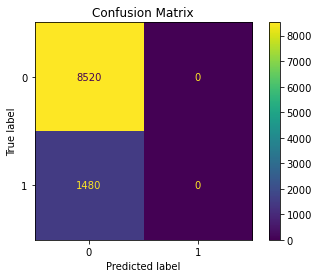

In [14]:
from sklearn.metrics import plot_confusion_matrix

# Assuming you have trained your logistic regression model and made predictions on a test dataset
plot_confusion_matrix(model, X_test, y_test)  # Replace model, X_test, and y_test with your actual objects

plt.title("Confusion Matrix")
plt.show()


In [15]:
from sklearn.metrics import confusion_matrix

# Assuming you have trained your logistic regression model and made predictions on a test dataset
y_pred = model.predict(X_test)  # Replace X_test with your test data
confusion_matrix = confusion_matrix(y_test, y_pred)  # Replace y_test with your true labels

print("Confusion Matrix:")
print(confusion_matrix)


Confusion Matrix:
[[8520    0]
 [1480    0]]
